## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.columns
#Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')
study_results.columns
#Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')

# Combine the data into a single dataset
mouse_study_results=pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_study_results.head()
#mouse_study_results= mouse_study_results.loc[mouse_study_results.duplicated(subset=[“Mouse ID”,“Timepoint”]), “Mouse ID”].unique()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouse_study_results["Mouse ID"].value_counts()

g989    13
c766    10
p136    10
o926    10
y865    10
        ..
x226     1
d133     1
t573     1
h428     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_ids=mouse_study_results.loc[mouse_study_results.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()

print(dup_mouse_ids)

['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 



In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_mouse_study_data = mouse_study_results[mouse_study_results['Mouse ID'].isin(dup_mouse_ids)==False]
clean_study_data=mouse_study_results[mouse_study_results["Mouse ID"].isin(dup_mouse_ids)==False]

clean_study_data.head(100)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_study_data["Mouse ID"].value_counts()

e213    10
q787    10
q597    10
s710    10
o926    10
        ..
b447     1
n482     1
x226     1
x336     1
v199     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [8]:
#Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
 #      'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
   #   dtype='object')# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_regimen=clean_study_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_regimen=clean_study_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
var_regimen=clean_study_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_regimen=clean_study_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_regimen=clean_study_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

regimen_summary= pd.DataFrame({"Mean Tumor Volume": mean_regimen,
                               "Median Tumor Volume": median_regimen,
                               "Variance Tumor Volume": var_regimen,
                               "STD Drug Tumor Volume": std_regimen,
                               "SEM Drug Tumor Volume": sem_regimen})
# Assemble the resulting series into a single summary dataframe.
regimen_summary.head()


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,STD Drug Tumor Volume,SEM Drug Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

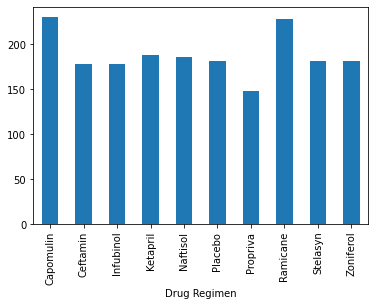

In [18]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
mouse_drug_regimen=clean_study_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
print(mouse_drug_regimen)

#Drug Regimen
#Capomulin    230
#Ceftamin     178
#Infubinol    178
#Ketapril     188
#Naftisol     186
mouse_drug_regimen.plot(kind="bar")
plt.show


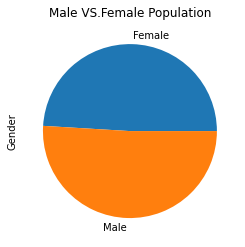

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

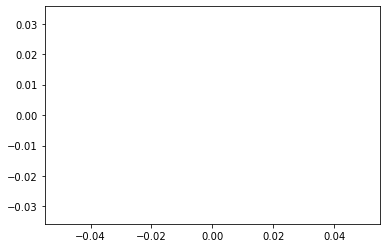

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_mice=clean_study_data.groupby("Sex")

gender_amount=gender_mice['Sex'].count()

gender_pie= gender_amount.plot(kind= "pie", y="Gender", title= "Male VS.Female Population")
gender_pie.set_ylabel("Gender")

plt.show()
plt.axis("equal")

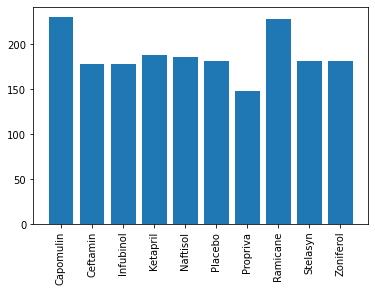

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#plt.bar
x_axis=mouse_drug_regimen.index.values
x_axis
y_axis=mouse_drug_regimen.values
y_axis
plt.bar(x_axis,y_axis)
plt.xticks(rotation=90)
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint=clean_study_data.groupby(["Mouse ID"]).max()["Timepoint"]
greatest_timepoint=greatest_timepoint.reset_index()
greatest_timepoint
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mergedf=greatest_timepoint.merge(clean_study_data,on=["Mouse ID","Timepoint"],how="left")

mergedf

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list=["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorvoldata=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:   
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    finaltumor=mergedf.loc[mergedf["Drug Regimen"]== drug,"Tumor Volume (mm3)"]
    
    # add subset 
    tumorvoldata.append(finaltumor)
    
    # Determine outliers using upper and lower bounds
    quartiles = finaltumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier=finaltumor.loc[(finaltumor<lower_bound)|(finaltumor>upper_bound)]
    print(outlier)

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


<function matplotlib.pyplot.show(close=None, block=None)>

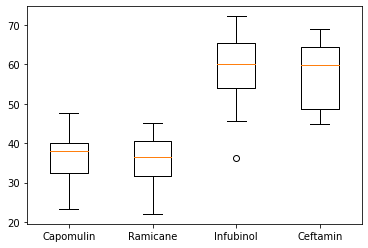

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumorvoldata,labels=treatment_list)
plt.show

## Line and Scatter Plots

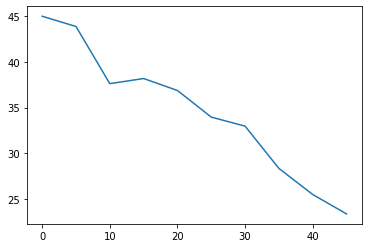

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_point=clean_study_data.loc[clean_study_data["Drug Regimen"]== "Capomulin"]

s185_mouseid=capomulin_point.loc[capomulin_point["Mouse ID"]=='s185']
plt.plot(s185_mouseid["Timepoint"],s185_mouseid["Tumor Volume (mm3)"])
plt.show()        

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
